<a href="https://colab.research.google.com/github/rizaho/ml_for_financial_analysis/blob/main/101_Time_Series_Analysis_And_Forecasting_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://ceb.udemy.com/course/time-series-analysis-and-forecasting-with-python/learn/lecture/27893330#overview


# ARIMA (Auto Regressive Integrated Moving Average)


## Auto Regressive:
In an autoregression model, we forecast the variable of interest using linear combination of past *values of the variable*.

* This is an Auto Regressive (AR) model of order **P** (parameter #1).
* P value states how much we want to go back in time to predict the X value in time t.

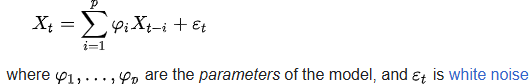

## Moving Average

* It's defines the moving average model as the moving average model uses *past forecast errors*

* This is Moving Average(MA) model of order **q** (parameter #2).

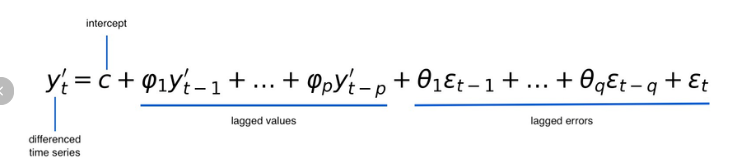

## Integrated

* Order of differencing.
* Differencing method is actually used when we want to change the *non-stationary data to the stationary*.

* Stationary Time Series: When a time series is stationary, it means that certain attributes of the data do not change over time.

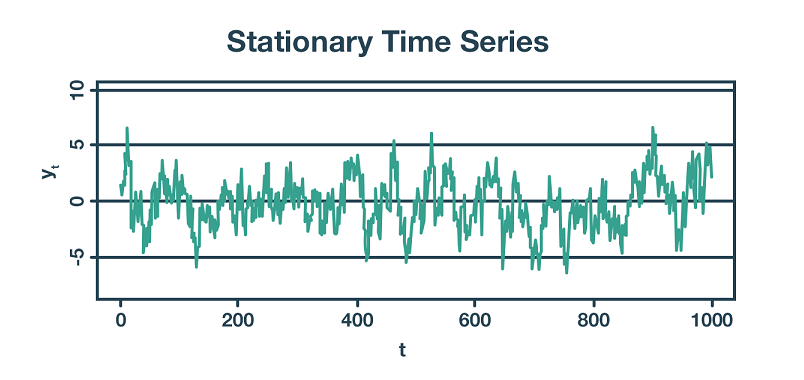

* Non-Stationary Time Series: However, some time series are non-stationary, whereby values and associations between and among variables do vary with time.
* Non-stationary behaviors can be trends, cycles, random walks, or combinations of the three.

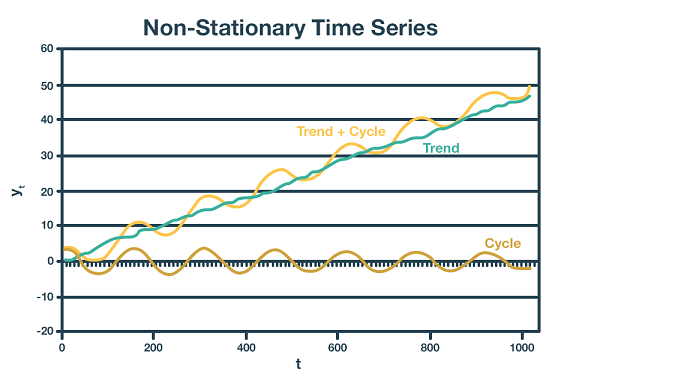

* In finance, many processes are non-stationary, and so must be handled appropriate.

* Ref: https://www.investopedia.com/articles/trading/07/stationary.asp#:~:text=When%20a%20time%20series%20is,so%20must%20be%20handled%20appropriate.